# SVM Assignment-Forest Dataset

## Data Dictionary

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [53]:
forest=pd.read_csv("C:\\Users\\delll\\Desktop\\Python\\DataSets\\forestfires.xls")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [54]:
forest.shape
#rows=517 and columns=31

(517, 31)

In [55]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [56]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [57]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [58]:
forest.isnull().sum()
#there are no null values

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [59]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Univariate Analysis

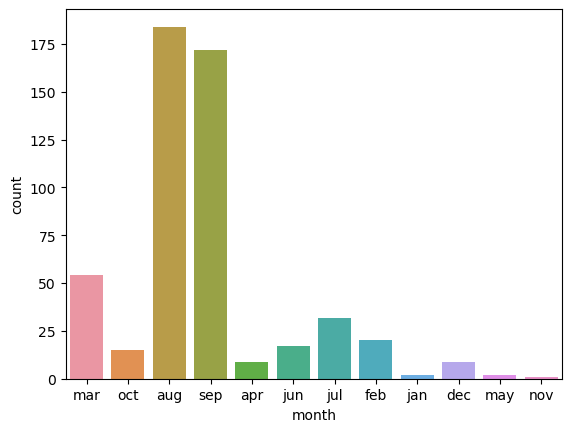

In [60]:
sns.countplot(x=forest["month"])
plt.show()
#Most of time forest fire occured in Augest and September month

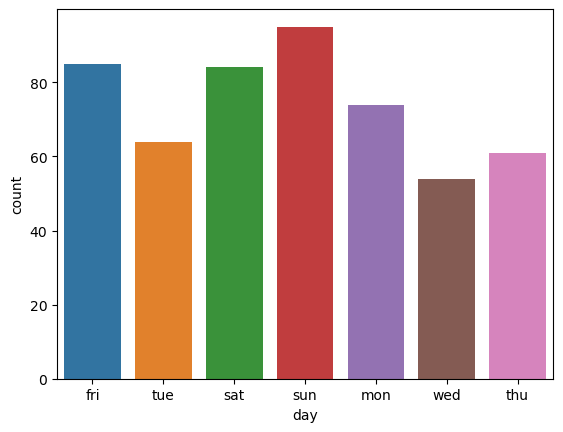

In [14]:
sns.countplot(x=forest["day"])
plt.show()
#Most of time forest fire occured on Friday,Sunday and Saturday.

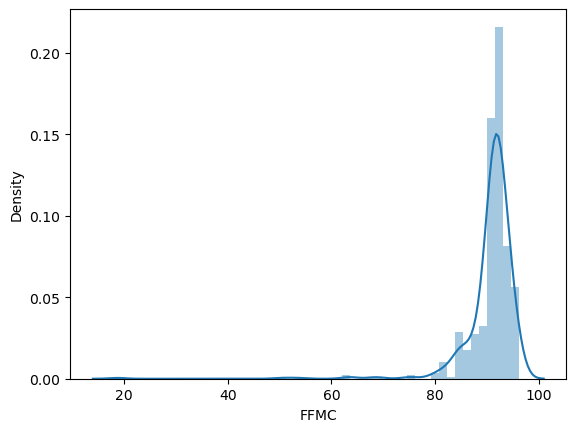

In [17]:
sns.distplot(forest.FFMC)
plt.show()
#data is normal and slight left skewed

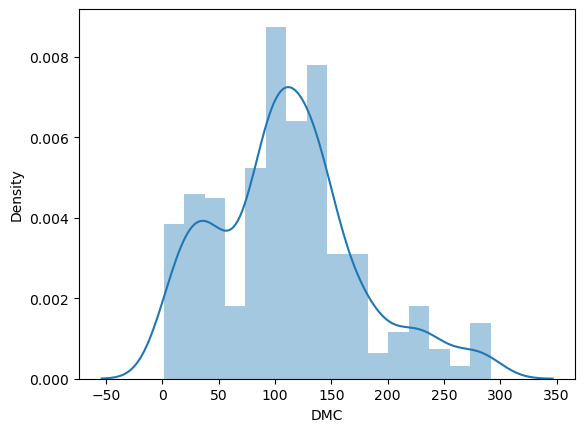

In [19]:
sns.distplot(forest.DMC)
plt.show()
#data is normal and slight right skewed

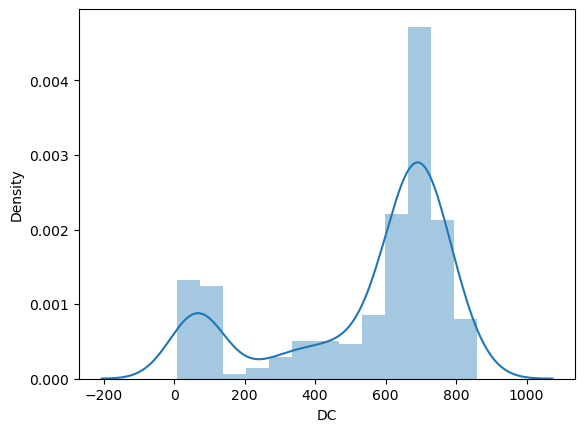

In [20]:
sns.distplot(forest.DC)
plt.show()
#data is bimodal and normal and slight left skewed

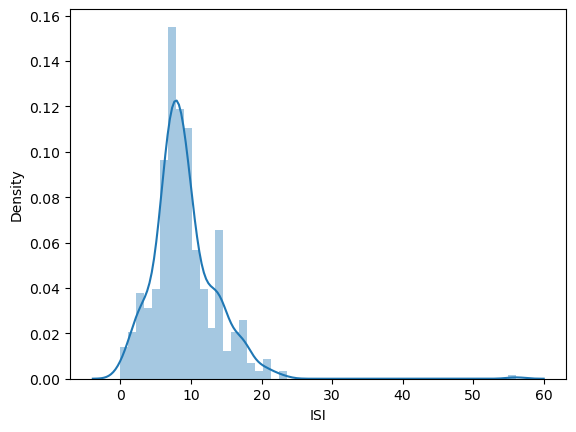

In [21]:
sns.distplot(forest.ISI)
plt.show()
#data is normal and slight RIGHT skewed

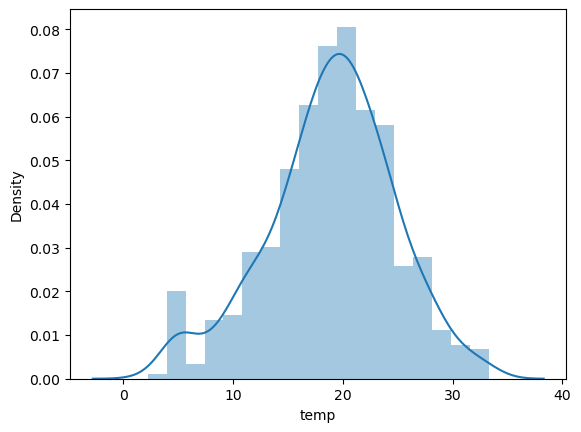

In [22]:
sns.distplot(forest.temp)
plt.show()
#data is normal and slight left skewed

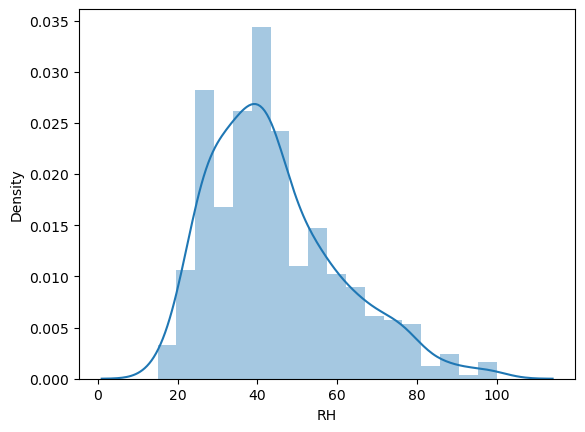

In [23]:
sns.distplot(forest.RH)
plt.show()
#data is normal and slight RIGHT skewed

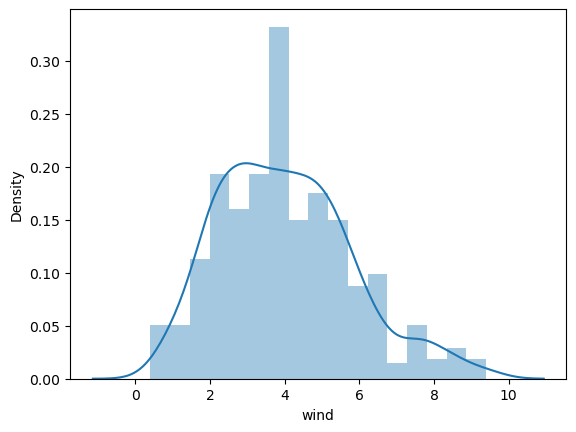

In [25]:
sns.distplot(forest.wind)
plt.show()
#data is normal and slight right skewed

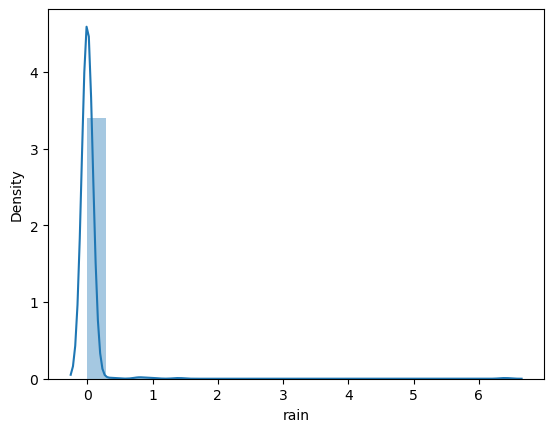

In [26]:
sns.distplot(forest.rain)
plt.show()
#data is normal and slight right skewed

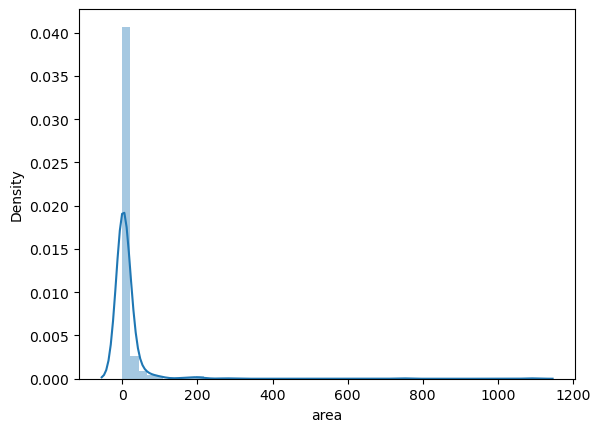

In [27]:
sns.distplot(forest.area)
plt.show()
#data is normal and slight right skewed

<Axes: >

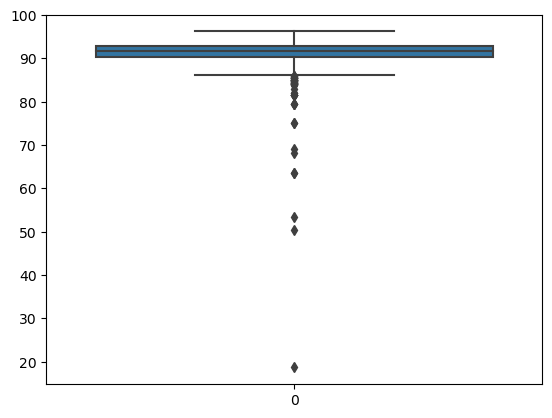

In [28]:
sns.boxplot(forest.FFMC)
#There are several outliers

<Axes: >

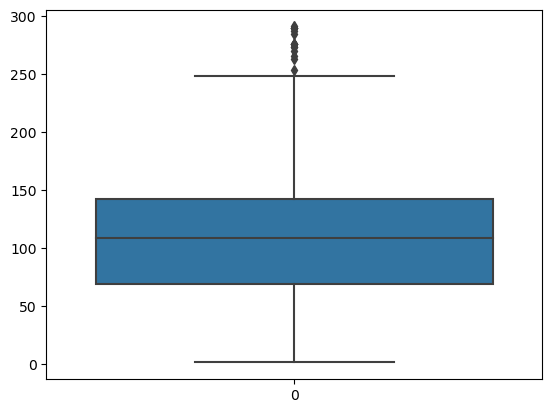

In [29]:
sns.boxplot(forest.DMC)
#There are several outliers

<Axes: >

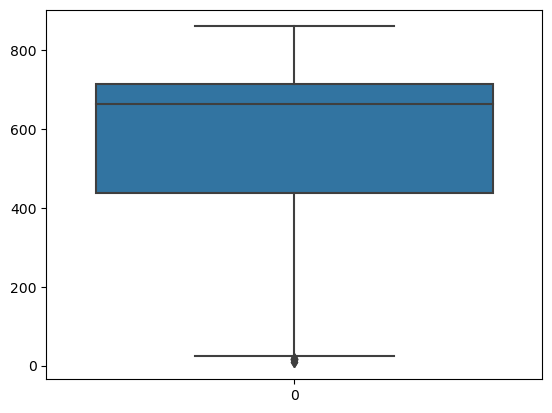

In [30]:
sns.boxplot(forest.DC)
#There are several outliers

<Axes: >

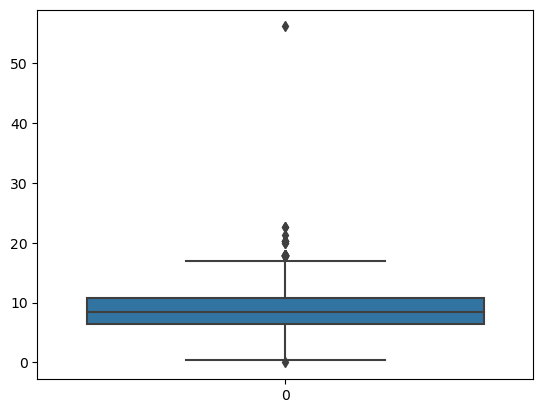

In [31]:
sns.boxplot(forest.ISI)
#There are several outliers

<Axes: >

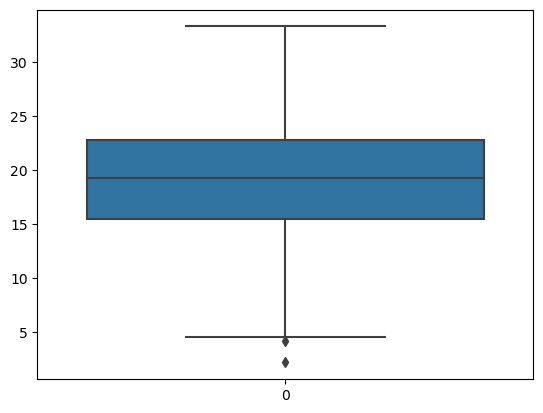

In [32]:
sns.boxplot(forest.temp)
#There are several outliers

<Axes: >

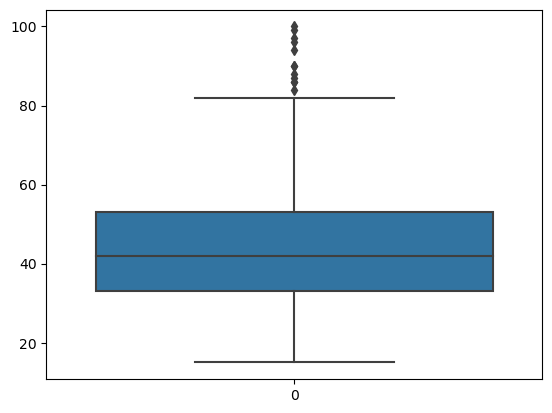

In [33]:
sns.boxplot(forest.RH)
#There are several outliers

<Axes: >

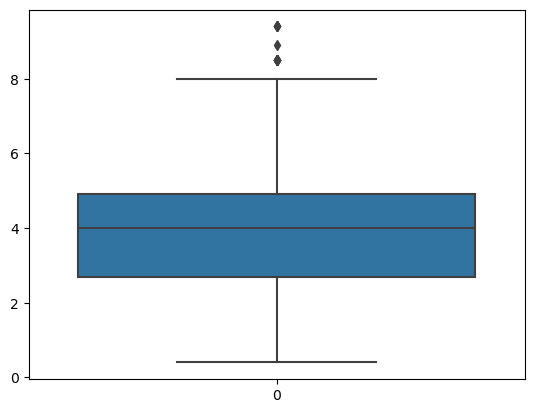

In [34]:
sns.boxplot(forest.wind)
#There are several outliers

<Axes: >

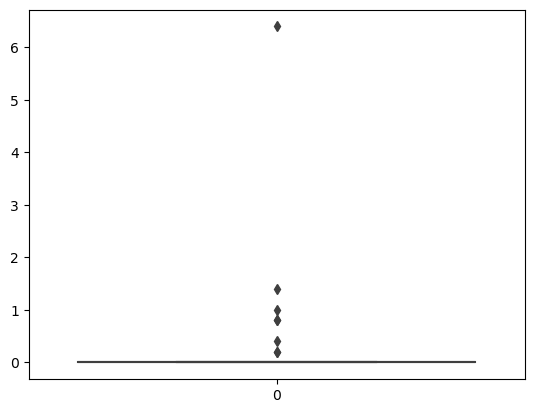

In [35]:
sns.boxplot(forest.rain)
#There are several outliers

<Axes: >

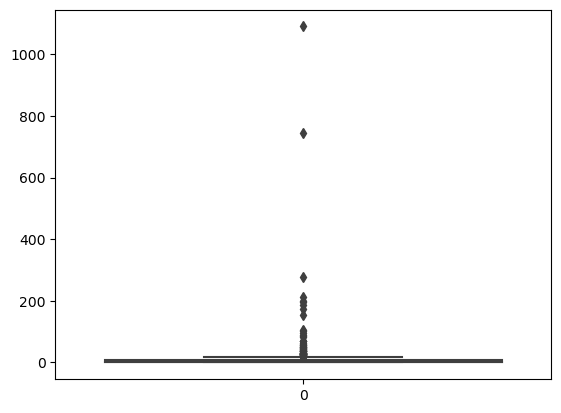

In [36]:
sns.boxplot(forest.area)
#There are several outliers

In [67]:
#Now let us check the Highest Fire In KM?
highest_fire_area = forest.sort_values(by="area", ascending=False).head(50)
highest_fire_area.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
238,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,...,0,0,0,0,0,0,0,0,1,large
415,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,...,0,0,0,0,0,0,0,0,0,large
479,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,...,0,0,1,0,0,0,0,0,0,large
237,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,...,0,0,0,0,0,0,0,0,1,large
236,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,...,0,0,0,0,0,0,0,0,1,large


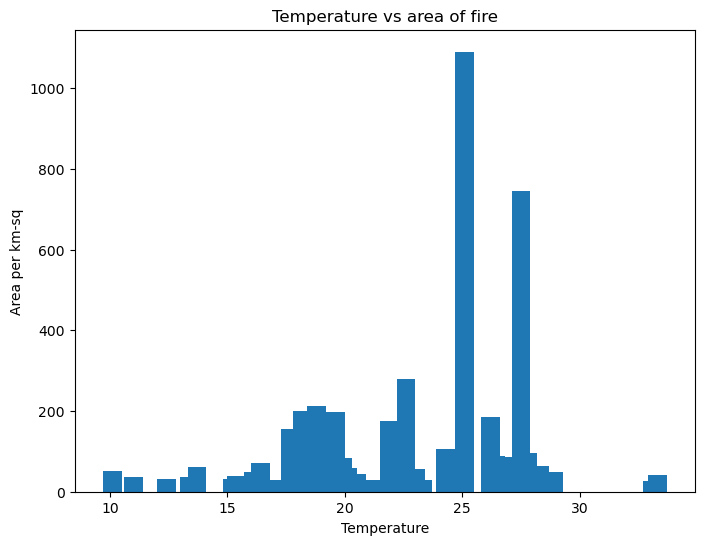

In [68]:
plt.figure(figsize=(8, 6))

plt.title("Temperature vs area of fire" )
plt.bar(highest_fire_area['temp'], highest_fire_area['area'])

plt.xlabel("Temperature")
plt.ylabel("Area per km-sq")
plt.show()
#once the fire starts,almost 1000+ sq area's temperature goes beyond 25 in Celcius and 
#around 750km area is facing temp 30+ celcius

In [71]:
#Now let us check the Highest rain In the forest?
highest_rain=forest.sort_values(by="rain",ascending=False)[['month', 'day', 'rain']].head(5)
highest_rain
#highest rain observed in the month of aug

,month,day,rain
499,aug,tue,6.4
509,aug,fri,1.4
243,aug,sun,1.0
500,aug,tue,0.8
501,aug,tue,0.8


In [72]:
#Let us check highest and lowest temperature in month and day wise
highest_temp = forest.sort_values(by='temp', ascending=False)[['month', 'day', 'temp']].head(5)

lowest_temp =  forest.sort_values(by='temp', ascending=True)[['month', 'day', 'temp']].head(5)


In [75]:
print("Highest temp:\n",highest_temp)
#In august month, tempeture is highest
print("-"*50)
print("Lowest temp:\n",lowest_temp)
#In december month, temperatur is lowest

Highest temp:
     month  day  temp
498   aug  tue  33.3
484   aug  sun  33.1
496   aug  mon  32.6
492   aug  fri  32.4
491   aug  thu  32.4
--------------------------------------------------
Lowest temp:
     month  day  temp
280   dec  fri   2.2
282   feb  sun   4.2
279   dec  mon   4.6
278   dec  mon   4.6
277   dec  mon   4.6


In [76]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
forest.size_category=labelencoder.fit_transform(forest.size_category)

In [77]:
#month and day columns are already encoded with one hot encoder
#so we can drop month and day columns from dataset
forest1=forest.drop(["month","day"],axis=1)

In [78]:
forest1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


<Axes: >

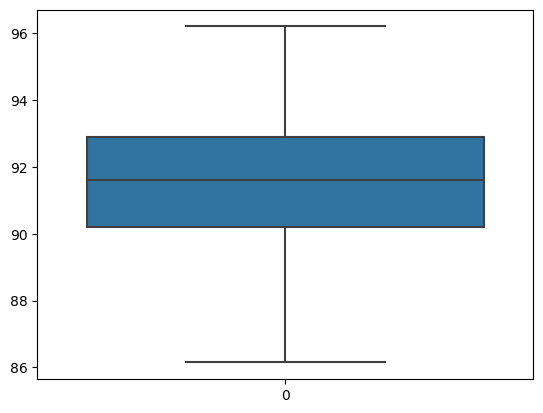

In [79]:
#remove the outliers
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="FFMC",tail="both")
forest1["FFMC"]=winsor.fit_transform(forest1[["FFMC"]])
sns.boxplot(forest1["FFMC"])

<Axes: >

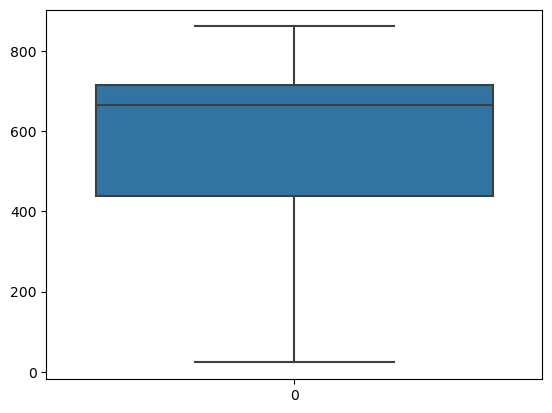

In [38]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="DC",tail="both")
forest["DC"]=winsor.fit_transform(forest[["DC"]])
sns.boxplot(forest["DC"])

<Axes: >

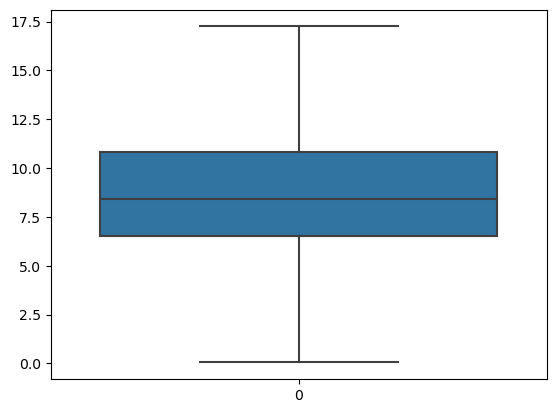

In [80]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="ISI",tail="both")
forest1["ISI"]=winsor.fit_transform(forest1[["ISI"]])
sns.boxplot(forest1["ISI"])

<Axes: >

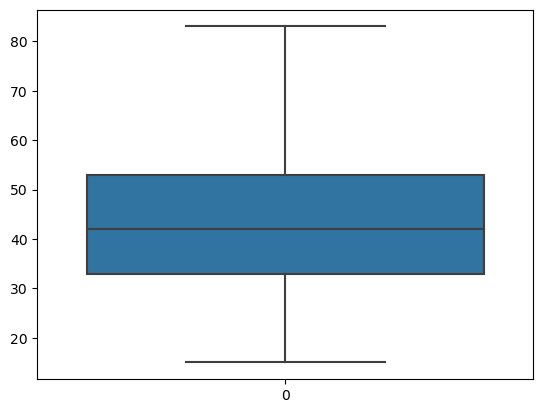

In [81]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="RH",tail="both")
forest1["RH"]=winsor.fit_transform(forest1[["RH"]])
sns.boxplot(forest1["RH"])

<Axes: >

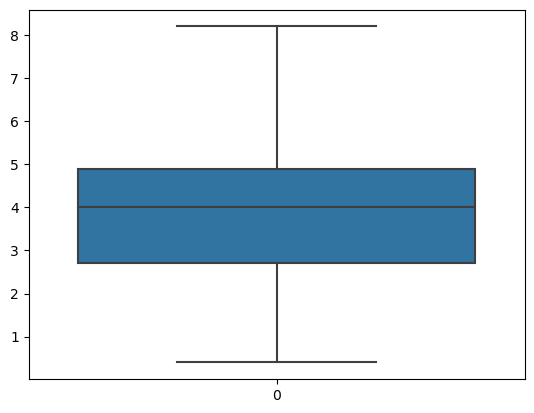

In [82]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="wind",tail="both")
forest1["wind"]=winsor.fit_transform(forest1[["wind"]])
sns.boxplot(forest1["wind"])

<Axes: >

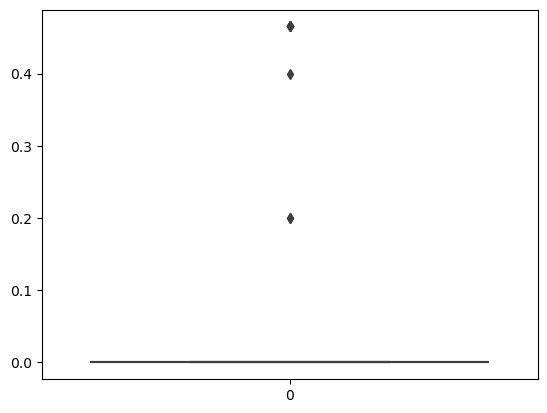

In [83]:
winsor=Winsorizer(capping_method="gaussian",fold=1.5,variables="rain",tail="both")
forest1["rain"]=winsor.fit_transform(forest1[["rain"]])
sns.boxplot(forest1["rain"])

<Axes: >

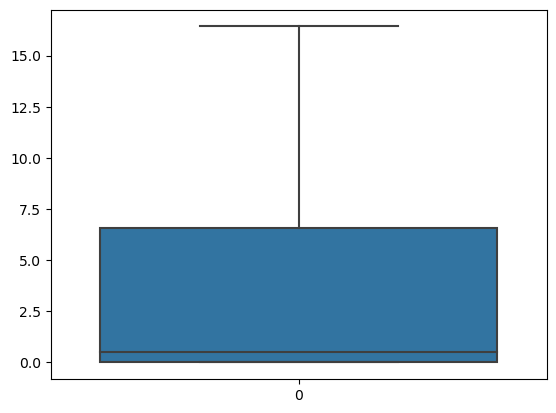

In [84]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="area",tail="both")
forest1["area"]=winsor.fit_transform(forest1[["area"]])
sns.boxplot(forest1["area"])

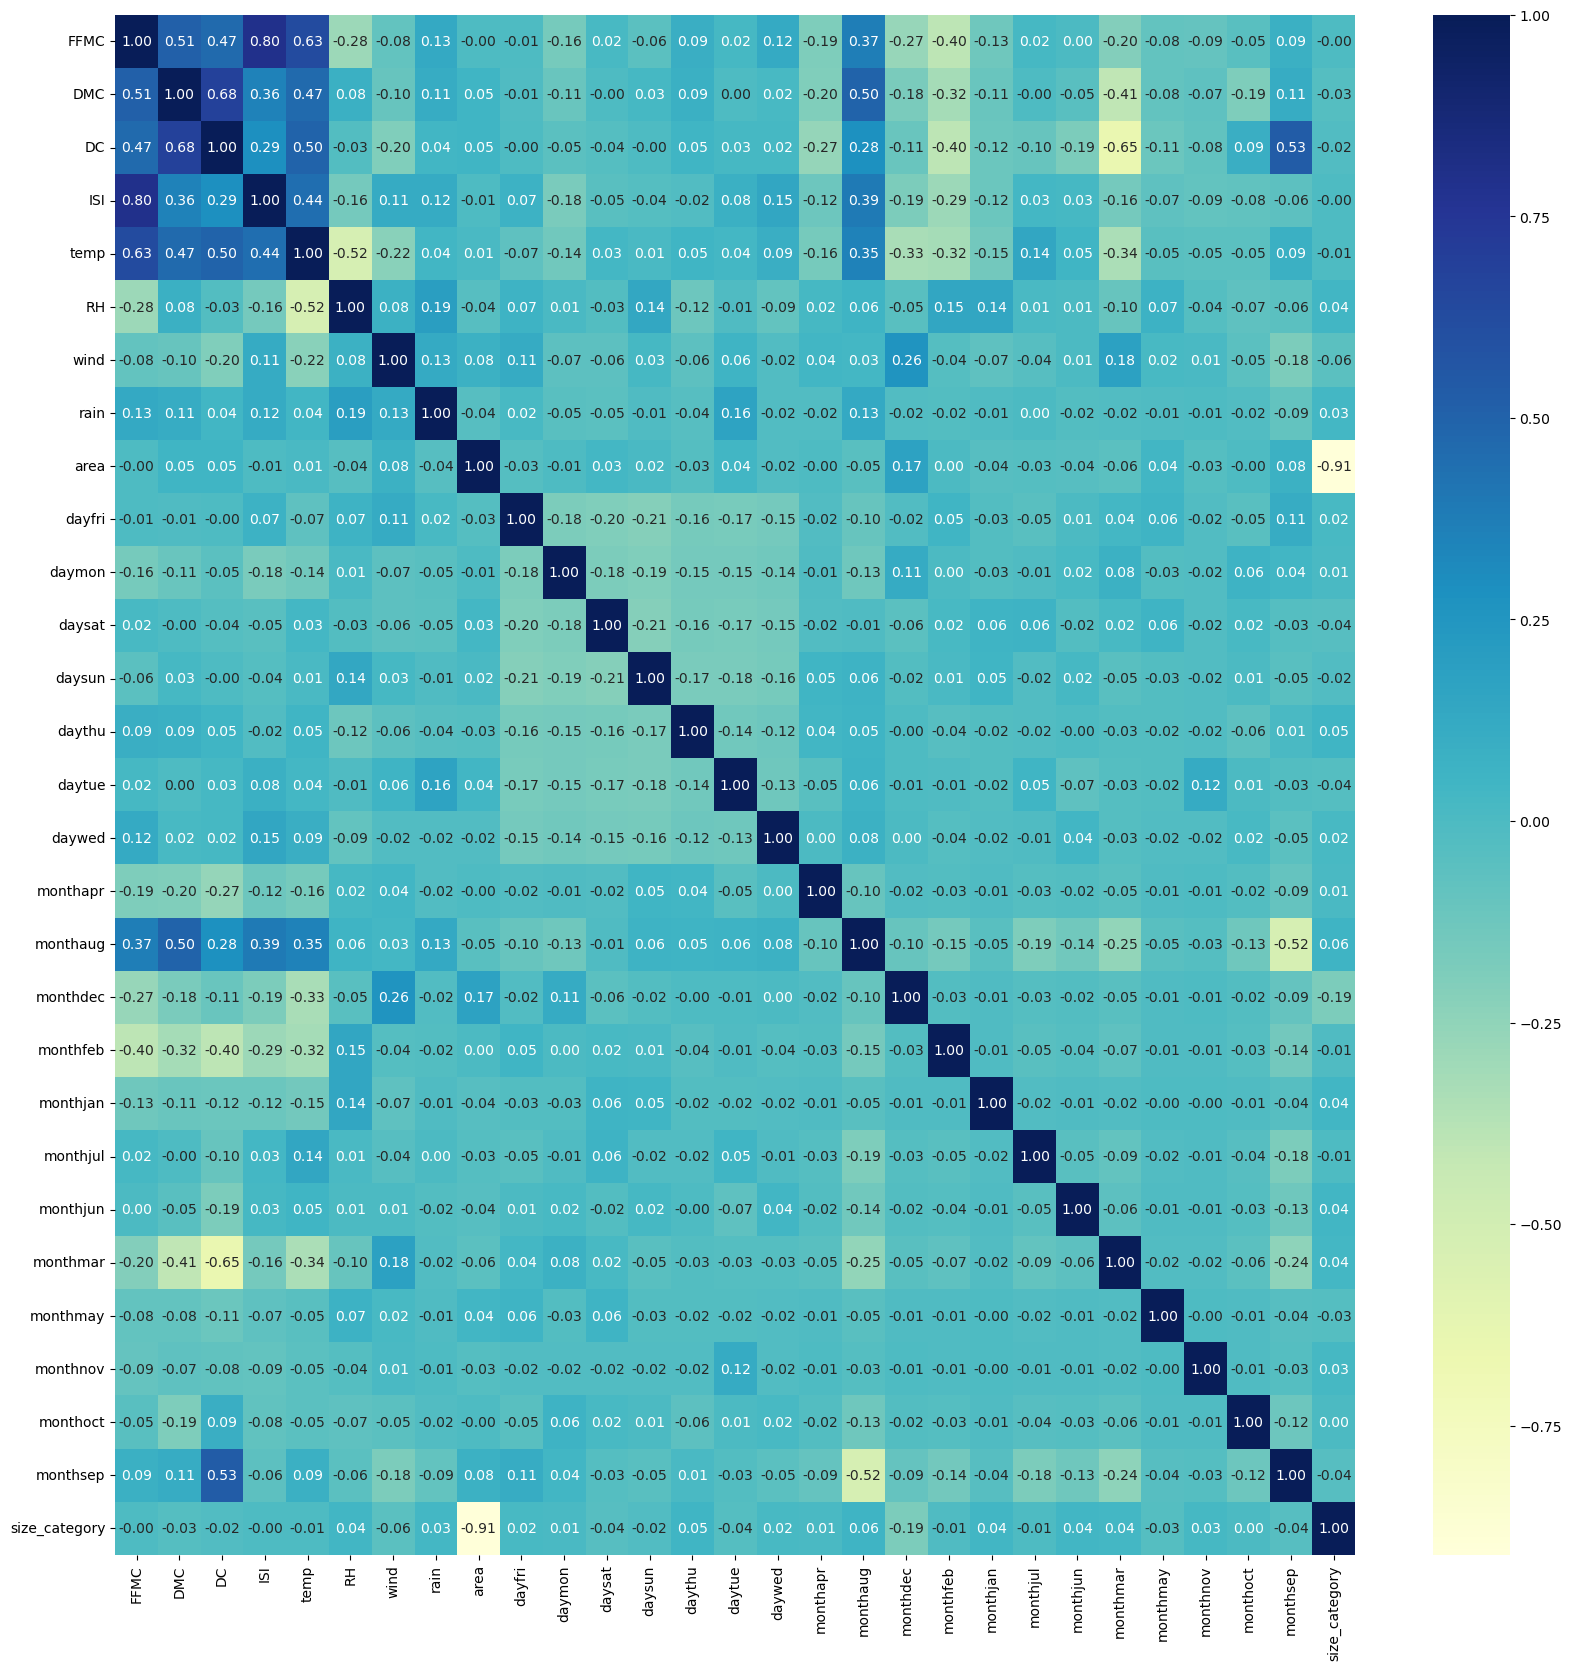

In [87]:
plt.figure(figsize=(20,20))
tc=forest1.corr()
sns.heatmap(tc,cmap="YlGnBu",annot=True,fmt=".2f")
plt.show()
#all the variables are moderately correlated with size_category except area

In [88]:
x=forest1.drop("size_category",axis=1)
y=forest1["size_category"]

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [90]:
from sklearn.svm import SVC
model=SVC(kernel="linear")
model.fit(x_train,y_train)

SVC(kernel='linear')

In [91]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [92]:
np.mean(y_pred==y_test)

0.9871794871794872

In [ ]:
# model Accuracy is 98%